We are looking for a solution to the heat/diffusion equation

$$\frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial x^2}$$

in the region $t \ge 0$, $0 \le x \le L$ subject to the boundary conditions

$$\begin{cases} C(x, 0) = C_0(x), \\ C(0, t) = C(L, t) = S. \end{cases}$$

To do so, we try the ansatz

$$C(x, t) = S + \sum_{n \ge 0} a_n(t) \sin \left( \frac{n \pi x}{L}  \right)$$

which reduces the heat equation to the family of ODEs

$$\dot{a}_n(t) = - D \left( \frac{n \pi}{L} \right)^2 a_n(t)$$

which have solutions

$$a_n(t) = a_{n, 0} e^{- D \left( \frac{n \pi}{L} \right)^2 t },$$

where the initial values $a_{n, 0}$ can be obtained by expressing the initial condition as a fourier series

$$\sum_{n \ge 0} a_{n, 0} \sin \left( \frac{n \pi x}{L} \right) = C(x, 0) - S = C_0(x) - S$$

hence

$$a_{n, 0} = \frac{2}{L} \int_0^L (C_0(x) - S) \sin \left( \frac{n \pi x}{L} \right) \mathrm{d}x.$$


For example, if $C_0(x) = 0$:


\begin{align*}
a_{n, 0} &= \frac{-2 S}{L} \int_0^L \sin \left(\frac{n \pi x}{L}\right) \mathrm{d}x\\
&= \frac{2 S}{L} \frac{L}{n \pi} \left[ \cos \left( \frac{n \pi x}{L} \right)) \right]_0^L,\\
&= \frac{2 S}{n \pi} \left( (-1)^n - 1 \right)).
\end{align*}

Hence $a_{(2 n), 0} = 0$ and $a_{2n + 1, 0} = - \frac{2 S}{(2 n + 1) \pi}$.

Let's try that out in python:

In [65]:
# Imports and globals
import pde
import numpy as np
import matplotlib.pyplot as plt

D = 1
S = 1
L = 1
SUM_LIMIT = 100
SPATIAL_RES = 1000
STOP_TIME = 0.02

In [66]:
# Set up fourier series
def a(n, t, diffusivity=D, saturation=S, length=L):
    if n % 2:  # Only need to check odd n
        initial_value = -4 * saturation / (n * np.pi)
        return initial_value * np.exp(-diffusivity * (n * np.pi / length) ** 2 * t)
    return 0


def C(x, t, diffusivity=D, saturation=S, length=L, sum_limit=SUM_LIMIT):
    return saturation + sum(
      map(
          lambda n: a(n, t, diffusivity, saturation, length) * np.sin(n * np.pi * x / length),
          range(sum_limit))
      )
 

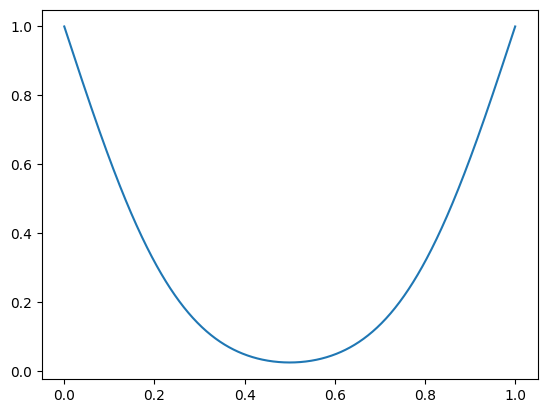

In [67]:
x_grid = np.linspace(0, L, SPATIAL_RES)
C_vals = [C(x, STOP_TIME) for x in x_grid]
plt.plot(x_grid, C_vals)

Now compare that to the ```py-pde''' package

Initializing:   0%|                                                            | 0/0.02 [00:00<?, ?it/s]/home/samc/.local/lib/python3.11/site-packages/pde/grids/boundaries/local.py:1821: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit
100%|██████████████████████████████████████████████████████████████| 0.02/0.02 [00:10<00:00, 525.07s/it]


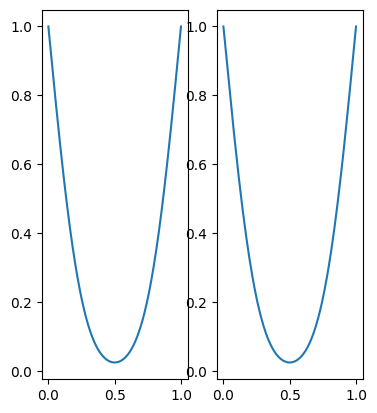

In [68]:
grid = pde.CartesianGrid([[0, 1]], SPATIAL_RES)
field = pde.ScalarField(grid)
eq = pde.pdes.diffusion.DiffusionPDE(bc=[{"value": S}])
sol = eq.solve(field, (0, STOP_TIME))

plt.subplot(131)
plt.plot(x_grid, C_vals)
plt.subplot(132)
plt.plot(sol.get_line_data()['data_x'], sol.get_line_data()['data_y'])


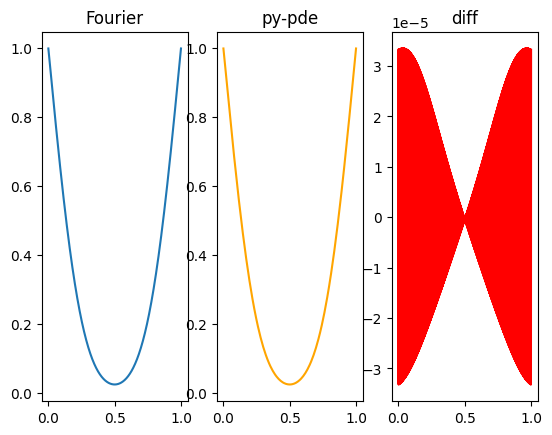

In [69]:
x_grid_shifted = sol.get_line_data()['data_x']
C_vals_shifted = [C(x, STOP_TIME) for x in x_grid_shifted]

plt.subplot(131, title="Fourier")
plt.plot(x_grid_shifted, C_vals_shifted)
plt.subplot(132, title="py-pde")
plt.plot(x_grid_shifted, sol.get_line_data()['data_y'], color="orange")
plt.subplot(133, title="diff")
plt.plot(x_grid_shifted, C_vals_shifted - sol.get_line_data()['data_y'], color="red")

In [70]:
sol.get_line_data(['data_x', 'data_y'])

ValueError: Unknown method `['data_x', 'data_y']` for `to_scalar`